In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Załaduj zbiór danych
data = fetch_20newsgroups(subset='all')
texts = data.data
labels = data.target

# Tokenizacja tekstu
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sekwencji
X = pad_sequences(sequences, maxlen=200)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [ ]:
# Budowa modelu CNN do klasyfikacji tekstu
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # Warstwa osadzenia
model.add(Conv1D(128, 5, activation='relu'))  # Warstwa konwolucyjna 1D
model.add(GlobalMaxPooling1D())  # Warstwa globalnego maksymalnego pooling
model.add(Dense(128, activation='relu'))  # Warstwa gęsta
model.add(Dropout(0.5))  # Dropout w celu zapobiegania przeuczeniu
model.add(Dense(len(set(labels)), activation='softmax'))  # Liczba klas w zbiorze danych

# Kompilacja modelu
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Trenowanie modelu
history = model.fit(X_train, y_train, epochs= 10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - accuracy: 0.1187 - loss: 2.8839 - val_accuracy: 0.5716 - val_loss: 1.5697
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 80s 171ms/step - accuracy: 0.6285 - loss: 1.3096 - val_accuracy: 0.7687 - val_loss: 0.7842
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.8231 - loss: 0.6203 - val_accuracy: 0.8130 - val_loss: 0.6220
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.9012 - loss: 0.3538 - val_accuracy: 0.8294 - val_loss: 0.5811
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.9535 - loss: 0.1921 - val_accuracy: 0.8321 - val_loss: 0.5764
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 43s 178ms/step - accuracy: 0.9761 - loss: 0.1022 - val_accuracy: 0.8302 - val_loss: 0.6013
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.9846 - loss: 0.0711 - val_accuracy: 0.8355 - val_loss: 0.6271
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.9928 - loss: 0

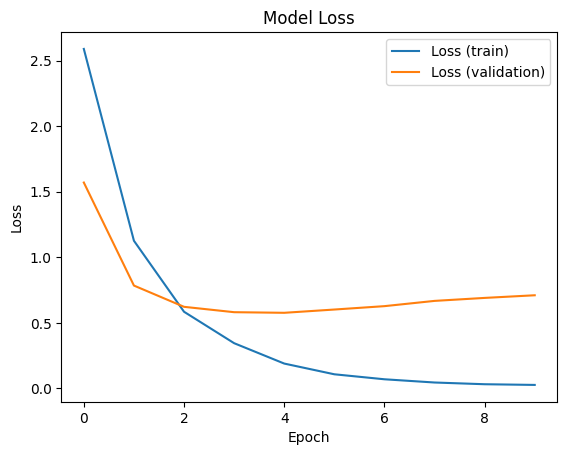

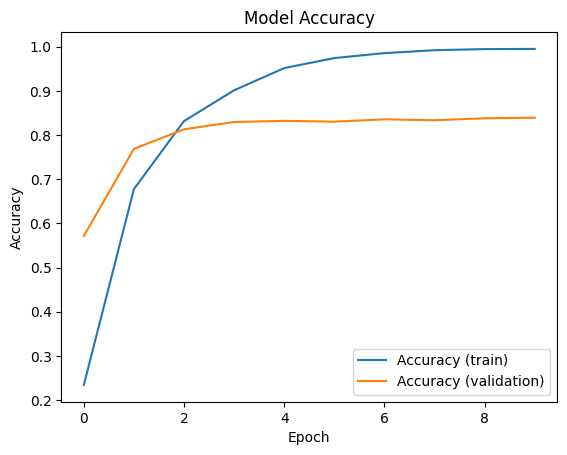

In [ ]:
# Wizualizacja wyników
# Rysowanie wykresu strat
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Rysowanie wykresu dokładności
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.87      0.84       151
           comp.graphics       0.70      0.80      0.75       202
 comp.os.ms-windows.misc       0.76      0.78      0.77       195
comp.sys.ibm.pc.hardware       0.62      0.75      0.68       183
   comp.sys.mac.hardware       0.87      0.81      0.84       205
          comp.windows.x       0.88      0.81      0.84       215
            misc.forsale       0.83      0.80      0.82       193
               rec.autos       0.87      0.92      0.90       196
         rec.motorcycles       0.88      0.90      0.89       168
      rec.sport.baseball       0.95      0.92      0.94       211
        rec.sport.hockey       0.89      0.97      0.93       198
               sci.crypt       0.95      0.94      0.95       201
         sci.electronics       0.90      0.75      0.82       202
                 sci.med       0.97      0.89      0.93       194
         

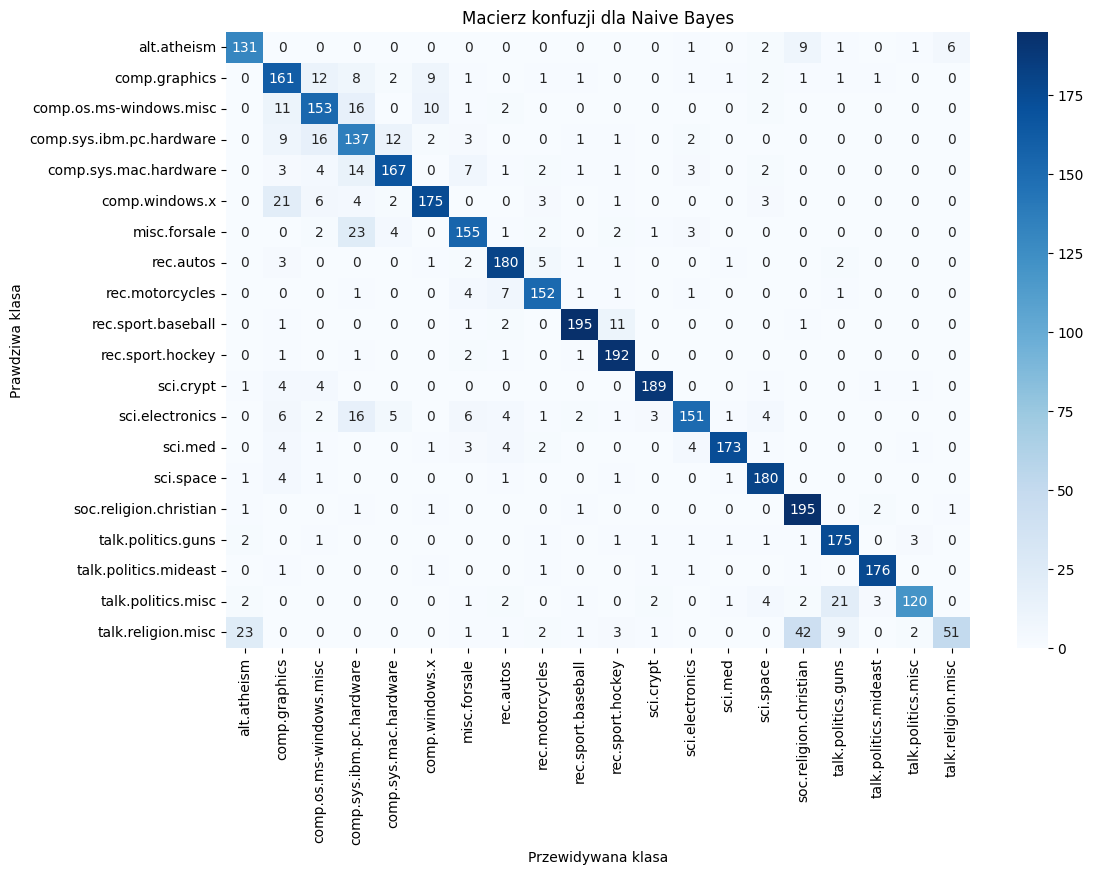

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predykcja
y_pred = nb_model.predict(X_test)

# Raport klasyfikacji
report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)

# Macierz konfuzji
conf_matrix = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy konfuzji
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Przewidywana klasa')
plt.ylabel('Prawdziwa klasa')
plt.title('Macierz konfuzji dla Naive Bayes')
plt.show()


                          precision    recall  f1-score   support

             alt.atheism       0.85      0.89      0.87       151
           comp.graphics       0.77      0.80      0.78       202
 comp.os.ms-windows.misc       0.83      0.82      0.83       195
comp.sys.ibm.pc.hardware       0.72      0.72      0.72       183
   comp.sys.mac.hardware       0.85      0.81      0.83       205
          comp.windows.x       0.87      0.85      0.86       215
            misc.forsale       0.84      0.82      0.83       193
               rec.autos       0.89      0.94      0.91       196
         rec.motorcycles       0.94      0.93      0.94       168
      rec.sport.baseball       0.95      0.94      0.95       211
        rec.sport.hockey       0.97      0.98      0.97       198
               sci.crypt       0.95      0.96      0.95       201
         sci.electronics       0.83      0.81      0.82       202
                 sci.med       0.92      0.94      0.93       194
         

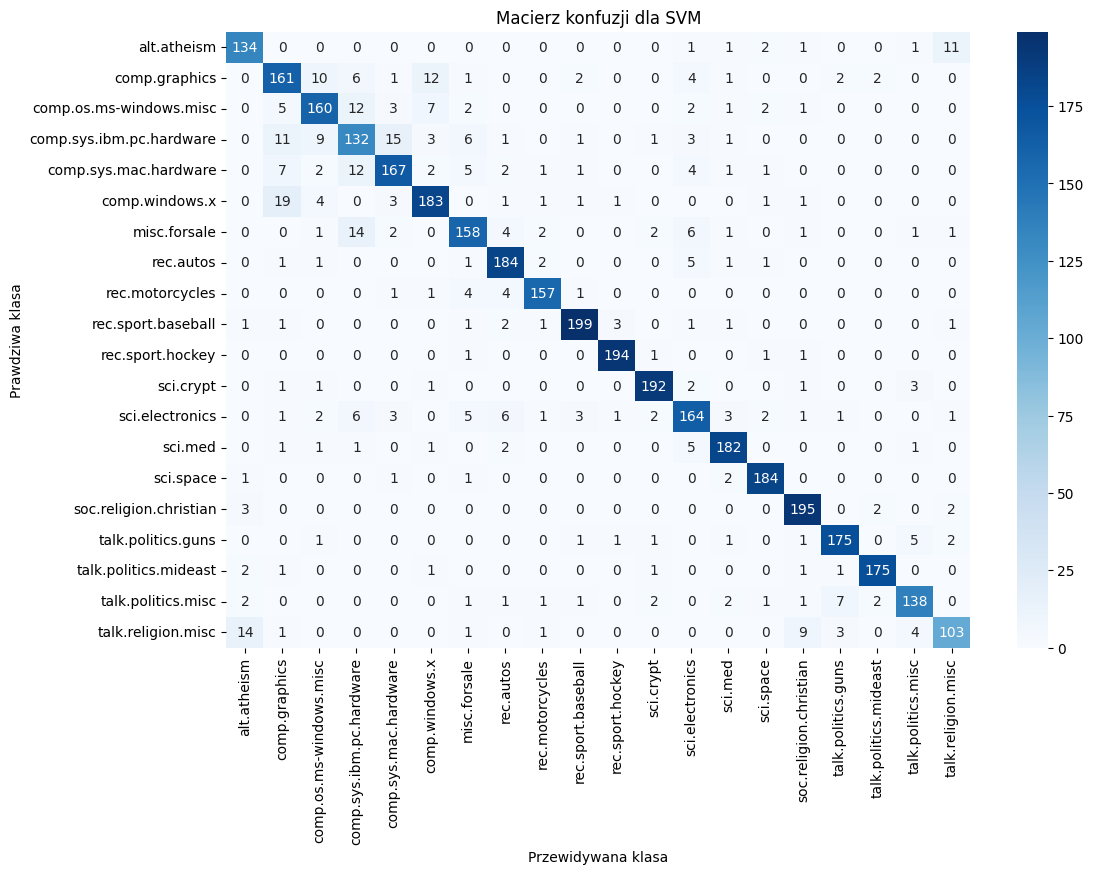

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Trenowanie modelu SVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predykcja
y_pred = svm_model.predict(X_test)

# Raport klasyfikacji
report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)

# Macierz konfuzji
conf_matrix = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy konfuzji
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Przewidywana klasa')
plt.ylabel('Prawdziwa klasa')
plt.title('Macierz konfuzji dla SVM')
plt.show()
